In [1]:

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)

print("Accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

#perform data normalization on Lines 31 and 32 by scaling the pixel intensities to the range [0, 1].
# scale data to the range of [0, 1]

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

Accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Each data point in the MNIST dataset has an output label in the range [0, 9], one for each of the possible ten digits in the MNIST dataset.
# A label with a value of 0 indicates that the corresponding image contains a zero digit. Similarly, a label with a value of 8 indicates
# that the corresponding image contains the number eight.

In [4]:
# However, we first need to transform these integer labels into vector labels,
#where the index in the vector for label is set to 1 and 0 otherwise (this process is called one-hot encoding).

one-hot encoding representations for each digit, 0−9, in the listing below:
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

As you can see, our network is a feedforward architecture, instantiated by the Sequential class on Line 40 —
this architecture implies that the layers will be stacked on top of each other with the output of the previous layer feeding into the next.

Line 41 defines the first fully connected layer in the network. The input_shape is set to 784,
the dimensionality of each MNIST data points. We then learn 256 weights in this layer and apply the sigmoid activation function.
The next layer (Line 42) learns 128 weights. Finally, Line 43 applies another fully connected layer,
this time only learning 10 weights, corresponding to the ten (0-9) output classes. Instead of a sigmoid activation,
we’ll use a softmax activation to obtain normalized class probabilities for each prediction.

In [10]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD optimizer
print("[INFO] training network...")
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=128)

[INFO] training network...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4424 - loss: 1.8007 - val_accuracy: 0.8519 - val_loss: 0.5789
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8633 - loss: 0.5121 - val_accuracy: 0.8972 - val_loss: 0.3693
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8970 - loss: 0.3620 - val_accuracy: 0.9100 - val_loss: 0.3120
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9091 - loss: 0.3133 - val_accuracy: 0.9212 - val_loss: 0.2741
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9206 - loss: 0.2760 - val_accuracy: 0.9276 - val_loss: 0.2517


In Line 47, we initialize the SGD optimizer with a learning rate of 0.01 (which we may commonly write as 1e-2).
We’ll use the category cross-entropy loss function as our loss metric (Lines 48 and 49). Using the cross-entropy
 loss function is also why we had to convert our integer labels to vector labels.

A call to .fit of the model on Lines 50 and 51 kicks off the training of our neural network.
We’ll supply the training data and training labels as the first two arguments to the method.*italicized text*

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



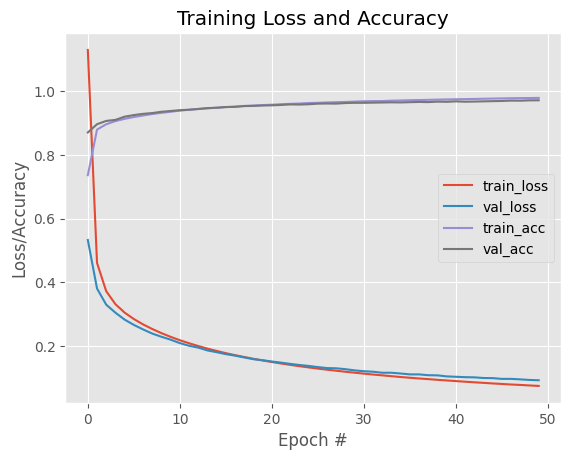

In [7]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [16]:
test_loss, test_acc= model.evaluate(testX, testY, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 - 1s - 3ms/step - accuracy: 0.9276 - loss: 0.2517
Test accuracy: 0.9276000261306763
Test loss: 0.25166183710098267
